<a href="https://colab.research.google.com/github/softwarerbfl/imageProcessing/blob/main/Notebook-Week11/2022_1_ImgProc_HW11_%EB%B0%B0%EA%B7%9C%EB%A6%AC_32202018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 영상정보처리 11주차 과제 템플리트 
이름: 배규리           
학번: 32202018




# 구글 드라이브 마우팅 및 작업 경로로 이동
- 다음 쉘에 필요한 작업을 하시오. 

In [1]:
from google.colab import drive 
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Colab\ Notebooks/2022_영상정보처리/Notebook-Week\ 11
from google.colab.patches import cv2_imshow
import matplotlib.cm as cm
import numpy as np

Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks/2022_영상정보처리/Notebook-Week 11


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# matplot color display
def show_with_matplotlib_jh(img, title):
    if img is None:
      print("show_with_matplotlib: Could not read the image.")
      return

    if img.shape[2] != 3:
      print()
      print("show_with_matplotlib: given image does not contains 3 channels")
      return

    # Convert BGR image to RGB:
    img_RGB = img[:, :, ::-1]

    # Show the image using matplotlib:
    plt.imshow(img_RGB)
    plt.title(title)
    plt.show()

# matplot grayscale display
def show_with_matplotlib_gray_jh(img, title):
   if img is None:
      print("show_with_matplotlib_gray: Could not read the image.")
      return

   if img.ndim > 2:
      print()
      print("show_with_matplotlib: given image has more than 2 dim")
      return
      
   plt.imshow(img, cmap="gray")
   plt.title(title)
   plt.show()

def show_with_matplotlib_MO4(color_img, title, pos, axis_show):
    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(3, 6, pos)
    plt.imshow(img_RGB)
    plt.title(title)

    if not axis_show:
      plt.axis('off')

    plt.show()

In [3]:
image_path_airplane = '../Dongkeun-OpenCV-ImgData/airplane_bw.png'
image_path_horse = '../Dongkeun-OpenCV-ImgData/horse_bw.png'

다음 두 개의 이미지에 대해 스켈레톤을 구하는 프로세스를 작성하고, 결과를 가시화하시오.  

입력 이미지 - 이미지 폴더에 없는 경우, 첨부된 이미지를 다운받아 폴더에 넣고 실행하기
- airplane_bw.png
- horse_bw.png

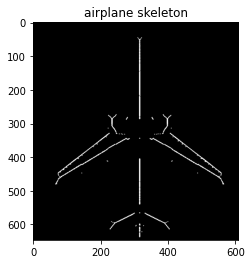

In [14]:
airplane=cv2.imread(image_path_airplane,cv2.IMREAD_GRAYSCALE)
ret,threshed_img=cv2.threshold(airplane,127,255,cv2.THRESH_BINARY_INV)
skel_dst=np.zeros(airplane.shape,np.uint8)
element=cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done=False
while(not done):
  eroded=cv2.erode(threshed_img,element)
  opened=cv2.morphologyEx(eroded,cv2.MORPH_OPEN,element)
  tmp=cv2.subtract(eroded,opened)
  skel_dst=cv2.bitwise_or(skel_dst,tmp)
  threshed_img=eroded.copy()
  if cv2.countNonZero(threshed_img)==0:
    done=True
skel_dst=cv2.dilate(skel_dst,element)
show_with_matplotlib_gray_jh(skel_dst,"airplane skeleton")


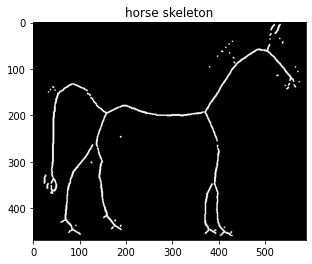

In [13]:
horse=cv2.imread(image_path_horse,cv2.IMREAD_GRAYSCALE)
ret, threshed_img=cv2.threshold(horse, 50,255,cv2.THRESH_BINARY)
skel_dst=np.zeros(horse.shape, dtype=horse.dtype)
struct_element=cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(3,3))
done=False
while(not done):
  eroded=cv2.erode(threshed_img, element)
  opened=cv2.morphologyEx(eroded, cv2.MORPH_OPEN, element)
  tmp=cv2.subtract(eroded,opened)
  skel_dst=cv2.bitwise_or(skel_dst,tmp)
  threshed_img=eroded.copy()
  if cv2.countNonZero(threshed_img)==0:
    done=True
skel_dst=cv2.dilate(skel_dst, struct_element)
show_with_matplotlib_gray_jh(skel_dst, "horse skeleton")

## 문제 2

"2021-1 ImgProc JB-CH07-JHU2104-V1.pdf" 에서 저자 구현 코드와 opencv 함수를 이용하는 방법 둘 다 이용해서 예시를 보여주고 있습니다. 저자 구현 코드와 opencv 를 이용한 방법의 결과를 디스플레이하고, 두 결과를 픽셀 단위로 비교하여 몇 개의 픽셀이 다른 지 계산하고, 픽셀이 다른 경우, 다른 부분만을 영상을 만들어 디스플레이 하시오. 
- 필요한 이미지는 '../Dongkeun-OpenCV-ImgData' 에 복사하여 넣어서 수행
 
1. 예제 7.2.5 (소벨 엣지 검출)
2. 예제 7.2.6 (라플라시안 엣지 검출)
3. 예제 7.2.8 (캐니 엣지 검출)


1. 예제 7.2.5 (소벨 엣지 검출)

다른 픽셀의 개수: 104195


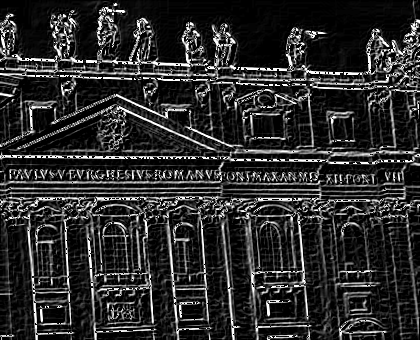

In [15]:
image=cv2.imread( '../Dongkeun-OpenCV-ImgData/edge.jpg',cv2.IMREAD_GRAYSCALE)

def differential(image,data1,data2):
  mask1=np.array(data1,np.float32).reshape(3,3)
  mask2=np.array(data2,np.float32).reshape(3,3)

  dst1=cv2.filter2D(image,-1,mask1)
  dst2=cv2.filter2D(image,-1,mask2)

  dst1=cv2.convertScaleAbs(dst1)
  dst2=cv2.convertScaleAbs(dst2)
  dst=dst1+dst2
  dst=cv2.convertScaleAbs(dst)
  return dst,dst1,dst2

if image is None: raise Exception("영상파일 읽기 오류")
data1=[-1,0,1,
       -2,0,2,
       -1,0,1]
data2=[-1,-2,-1,
       0,0,0,
       1,2,1]
#사용자 정의 함수 사용 
dst,dst1,dst2=differential(image,data1,data2)

#OpenCV Sobel함수 사용 
gx=cv2.Sobel(np.float32(image),cv2.CV_32F, 1,0,3)
gy=cv2.Sobel(np.float32(image),cv2.CV_32F,0,1,3)
gx=cv2.convertScaleAbs(gx)
gy=cv2.convertScaleAbs(gy)
result=gx+gy

result=result-dst

count=0
h, w = result.shape[:2]
for y in range(h):
    for x in range(w):
      if result[y,x]!=0:
        count+=1
print("다른 픽셀의 개수:",count) #다른 픽셀의 개수 출력 

cv2_imshow(result)

2. 예제 7.2.6 (라플라시안 엣지 검출)


mask4를 적용하였을 때 OpenCV함수일 때와 다른 픽셀의 개수: 0


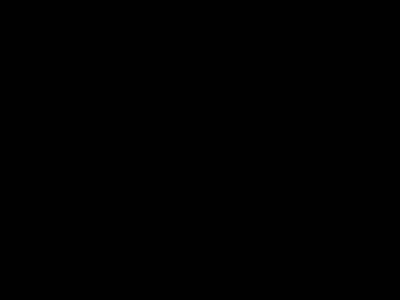

mask8를 적용하였을 때 OpenCV함수일 때와 다른 픽셀의 개수: 116688


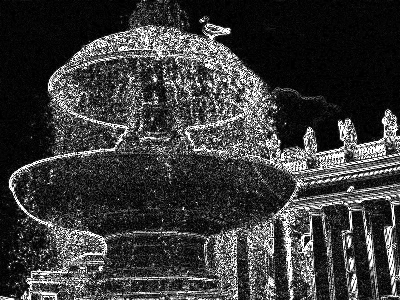

In [16]:
image=cv2.imread("../Dongkeun-OpenCV-ImgData/laplacian.jpg",cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상 파일 읽기 오류")
data1=[ [0,1,0],
       [1,-4,1],
       [0,1,0]]
data2=[ [-1,-1,-1],
       [-1,8,-1],
       [-1,-1,-1]]
mask4=np.array(data1,np.int16)
mask8=np.array(data2,np.int16)
dst1=cv2.filter2D(image,cv2.CV_16S,mask4)#mask4적용
dst2=cv2.filter2D(image,cv2.CV_16S,mask8)#mask8적용
dst3=cv2.Laplacian(image,cv2.CV_16S,1)#OpenCV함수 적용
#첫 번째 결과와의 차이 
result1=cv2.convertScaleAbs(dst3-dst1)
#두 번째 결과와의 차이
result2=cv2.convertScaleAbs(dst3-dst2)
count1=0
h, w = result1.shape[:2]
for y in range(h):
    for x in range(w):
      if result1[y,x]!=0:
        count1+=1
print("mask4를 적용하였을 때 OpenCV함수일 때와 다른 픽셀의 개수:",count1) #다른 픽셀의 개수 출력 
cv2_imshow(result1)

count2=0
h, w = result2.shape[:2]
for y in range(h):
    for x in range(w):
      if result2[y,x]!=0:
        count2+=1
print("mask8를 적용하였을 때 OpenCV함수일 때와 다른 픽셀의 개수:",count2) #다른 픽셀의 개수 출력 
cv2_imshow(result2)

3. 예제 7.2.8 (캐니 엣지 검출)

다른 픽셀의 개수: 36156


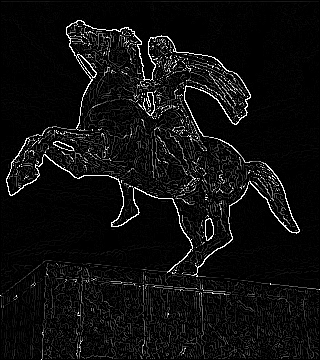

In [17]:
def nonmax_suppresion(sobel,direct):
  rows,cols=sobel.shape[:2]
  dst=np.zeros((rows,cols),np.float32)
  for i in range(1,rows-1):
    for j in range(1,cols-1):
      values=sobel[i-1:i+2, j-1:j+2].flatten()
      first=[3,0,1,2]
      id=first[direct[i,j]]
      v1,v2=values[id],values[8-id]
      dst[i,j]=sobel[i,j] if (v1<sobel[i,j]>v2) else 0
  return dst

def trace(max_sobel,i,j,low):
  h,w=max_sobel.shape
  if(0<=i<h and 0<=j<w)==False: return
  if pos_ck[i,j]>0 and max_sobel[i,j]>low:
    pos_ck[i,j]=255
    canny[i,j]=255

    trace(max_sobel,i-1,j-1,low)
    trace(max_sobel,i+1,j-1,low)
    trace(max_sobel,i,j-1,low)
    trace(max_sobel,i-1,j,low)
    trace(max_sobel,i+1,j,low)
    trace(max_sobel,i-1,j+1,low)
    trace(max_sobel,i,j+1,low)
    trace(max_sobel,i+1,j+1,low)

def hysteresis_th(max_sobel,low,high):
  rows,cols=max_sobel.shape[:2]
  for i in range(1,rows-1):
    for j in range(1,cols-1):
      if max_sobel[i,j]>=high: trace(max_sobel,i,j,low)

image=cv2.imread("../Dongkeun-OpenCV-ImgData/canny.jpg",cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 오류")

pos_ck=np.zeros(image.shape[:2],np.uint8)
canny=np.zeros(image.shape[:2],np.uint8)

gaus_img=cv2.GaussianBlur(image,(5,5), 0.3)
Gx=cv2.Sobel(np.float32(gaus_img),cv2.CV_32F,1,0,3)
Gy=cv2.Sobel(np.float32(gaus_img),cv2.CV_32F,0,1,3)
sobel=cv2.magnitude(Gx,Gy)

directs=cv2.phase(Gx,Gy)/(np.pi/4)
directs=directs.astype(int) %4
max_sobel=nonmax_suppresion(sobel,directs)
hysteresis_th(max_sobel,100,150)

canny2=cv2.Canny(image,100,150)

result=cv2.convertScaleAbs(canny2-max_sobel)
#cv2_imshow(max_sobel) #사용자 정의함수 사용
#cv2_imshow(canny2) #OpenCV함수 사용

count=0
h, w = result.shape[:2]
for y in range(h):
    for x in range(w):
      if result[y,x]!=0:
        count+=1
print("다른 픽셀의 개수:",count)
cv2_imshow(cv2.convertScaleAbs(canny2-max_sobel))